## Informe de Calidad de Datos

*20 de Junio de 2022.*

En este notebook dedicaremos a realizar una evaluación de la calidad de los datos para tomar acciones correctivas que nos permitan realizar un proceso de Data-Driven con datos correctos y concretos.

+ Objetivos:
    - Verificar si existen fallas en la ingesta de los datos.
    - Si existen tales fallas, realizar un trazado de los datos que nos permita seguir hasta el origen de estas fallas en el esquema de ingestión de datos de la empresa.
    - Realizar un seguimiento a fenómenos anormales que se puedan presentar en el proceso de trabajo normal de la empresa.

Nos encontramos con 7 archivos de diferentes fuentes de la empresa.

- Ventas.
- Clientes.
- Compras.
- Gasto.
- Localidades.
- Proveedores.
- Sucursales.

En base a estos datos, evaluaremos sus datos de acuerdo a las siguientes observaciones:

- Numero de datos faltantes.
- Proporcionalidad de los datos faltantes.
- Valores anormales u outliers.
- Conclusiones acerca de la calidad de la fuente.

In [1]:
# Importación de librerias

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import funciones as func
sns.set()

### Calidad de los valores en Ventas

In [2]:
df_ventas = pd.read_csv('../data/Venta.csv')
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46645 entries, 0 to 46644
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdVenta        46645 non-null  int64  
 1   Fecha          46645 non-null  object 
 2   Fecha_Entrega  46645 non-null  object 
 3   IdCanal        46645 non-null  int64  
 4   IdCliente      46645 non-null  int64  
 5   IdSucursal     46645 non-null  int64  
 6   IdEmpleado     46645 non-null  int64  
 7   IdProducto     46645 non-null  int64  
 8   Precio         45721 non-null  float64
 9   Cantidad       45753 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.6+ MB


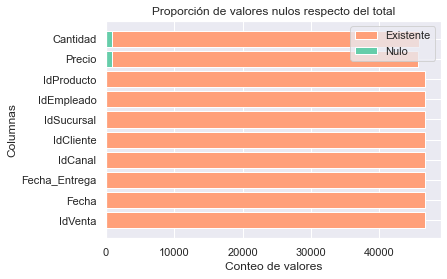

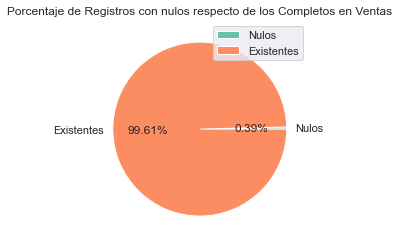

In [3]:
func.VisualEvaluation(df_ventas)

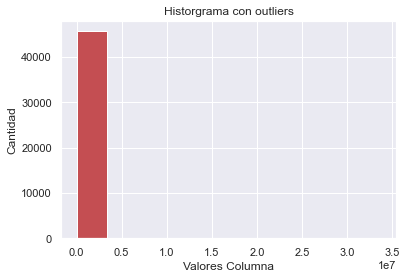

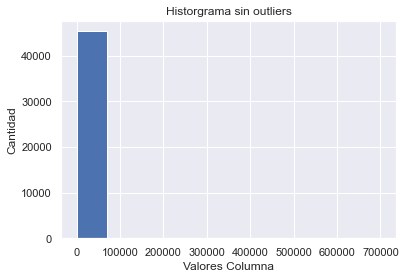

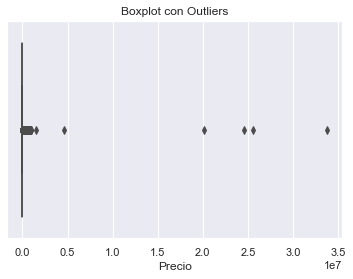

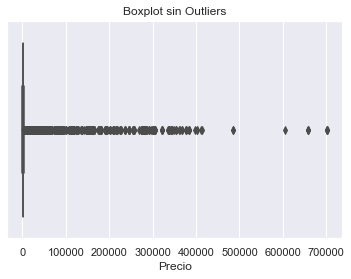

In [4]:
func.SigmaOutliers(df_ventas, 'Precio')

### Calidad de Valores en Compras

In [ ]:
df_compras = pd.read_csv('../data/Compra.csv')
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdCompra       11539 non-null  int64  
 1   Fecha          11539 non-null  object 
 2   Fecha_Año      11539 non-null  int64  
 3   Fecha_Mes      11539 non-null  int64  
 4   Fecha_Periodo  11539 non-null  int64  
 5   IdProducto     11539 non-null  int64  
 6   Cantidad       11539 non-null  int64  
 7   Precio         11172 non-null  float64
 8   IdProveedor    11539 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 811.5+ KB


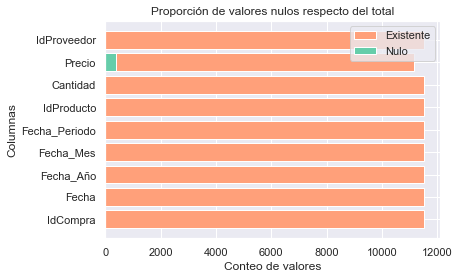

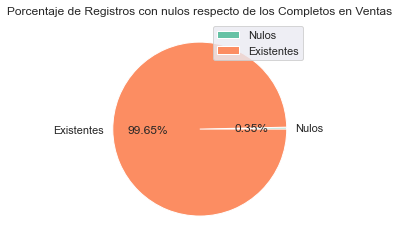

In [ ]:
func.VisualEvaluation(df_compras)

### Calidad de datos de Clientes

In [ ]:
df_clientes = pd.read_csv('../data/Clientes.csv', delimiter=';')
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2672 non-null   int64  
 1   Provincia          2647 non-null   object 
 2   Nombre_y_Apellido  2648 non-null   object 
 3   Domicilio          2630 non-null   object 
 4   Telefono           2637 non-null   object 
 5   Edad               2672 non-null   int64  
 6   Localidad          2647 non-null   object 
 7   X                  2616 non-null   object 
 8   Y                  2618 non-null   object 
 9   col10              0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 208.9+ KB


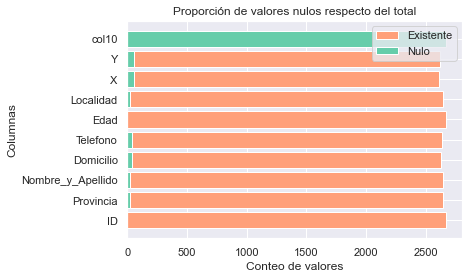

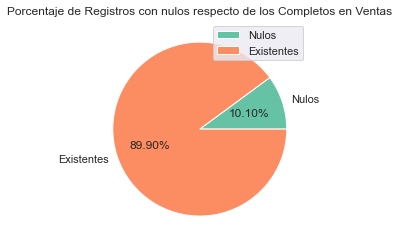

In [ ]:
VisualEvaluation(df_clientes)

In [ ]:
# conteo de valores nulos
count_missing = df_clientes.isna().sum().sum()
count_missing

2933

Borrando la columna col10 que no tiene ningun valor los valores se distribuyen así:

In [ ]:
df_clientes.drop('col10', axis=1, inplace=True)

In [ ]:
# conteo de valores nulos
count_missing = df_clientes.isna().sum().sum()
count_missing

261

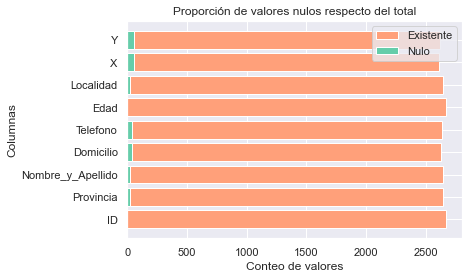

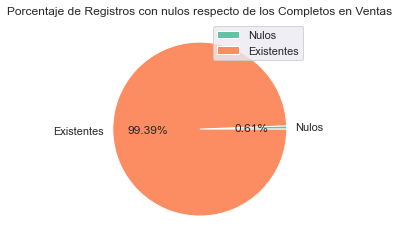

In [ ]:
VisualEvaluation(df_clientes)

### Calidad de los Datos en Gastos

In [ ]:
df_gastos = pd.read_csv('../data/Gasto.csv')
df_gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdGasto      8640 non-null   int64  
 1   IdSucursal   8640 non-null   int64  
 2   IdTipoGasto  8640 non-null   int64  
 3   Fecha        8640 non-null   object 
 4   Monto        8640 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 337.6+ KB


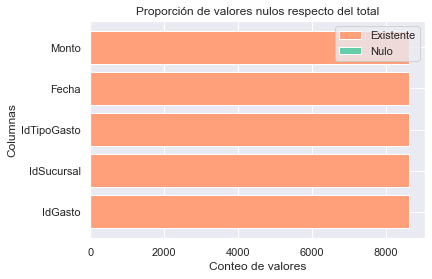

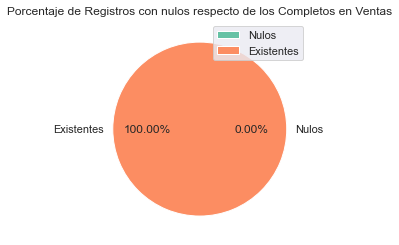

In [ ]:
VisualEvaluation(df_gastos)

### Calidad de Datos Localidades

In [ ]:
df_localidades = pd.read_csv('../data/Localidades.csv')
df_localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   categoria                4142 non-null   object 
 1   centroide_lat            4142 non-null   float64
 2   centroide_lon            4142 non-null   float64
 3   departamento_id          4141 non-null   float64
 4   departamento_nombre      4141 non-null   object 
 5   fuente                   4142 non-null   object 
 6   id                       4142 non-null   int64  
 7   localidad_censal_id      4142 non-null   int64  
 8   localidad_censal_nombre  4142 non-null   object 
 9   municipio_id             3599 non-null   float64
 10  municipio_nombre         3648 non-null   object 
 11  nombre                   4142 non-null   object 
 12  provincia_id             4142 non-null   int64  
 13  provincia_nombre         4142 non-null   object 
dtypes: float64(4), int64(3),

In [ ]:
# Total de valores nulos

count_missing = df_localidades.isna().sum().values
sum(count_missing)

1039

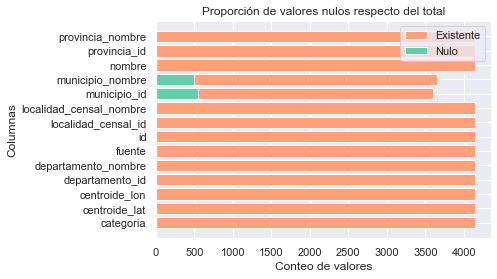

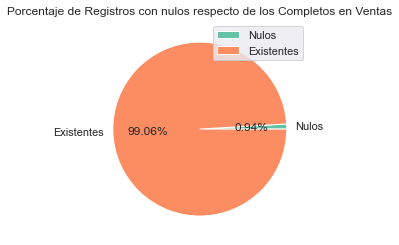

In [ ]:
VisualEvaluation(df_localidades)

### Calidad de Datos Proveedores

In [ ]:
df_proveedores = pd.read_csv('../data/Proveedores.csv', encoding='latin-1')
df_proveedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IDProveedor  14 non-null     int64 
 1   Nombre       12 non-null     object
 2   Address      14 non-null     object
 3   City         14 non-null     object
 4   State        14 non-null     object
 5   Country      14 non-null     object
 6   departamen   14 non-null     object
dtypes: int64(1), object(6)
memory usage: 912.0+ bytes


In [ ]:
count_missing = df_proveedores.isna().sum().values
sum(count_missing)

2

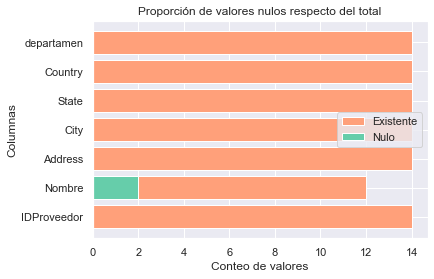

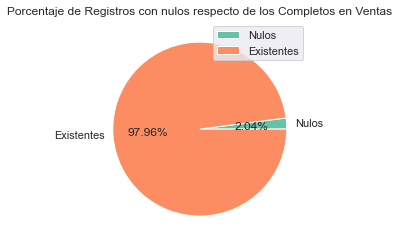

In [ ]:
VisualEvaluation(df_proveedores)

### Calidad de Datos Sucursales

In [ ]:
df_sucursales = pd.read_csv('../data/Sucursales.csv', delimiter=';')
df_sucursales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         31 non-null     int64 
 1   Sucursal   31 non-null     object
 2   Direccion  31 non-null     object
 3   Localidad  31 non-null     object
 4   Provincia  31 non-null     object
 5   Latitud    31 non-null     object
 6   Longitud   31 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


In [ ]:
count_missing = df_sucursales.isna().sum().values
sum(count_missing)

0

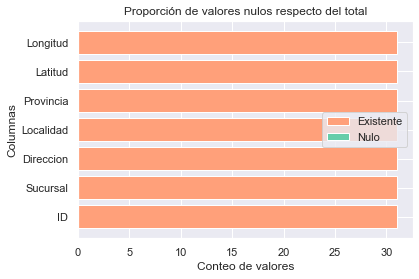

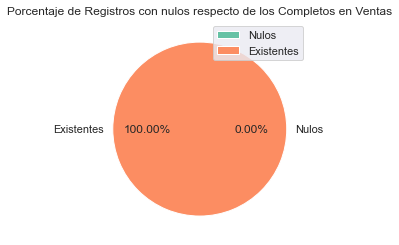

In [ ]:
VisualEvaluation(df_sucursales)

In [ ]:
# TODO: Poner graficos es una sola linea
# TODO: Agregar la cuenta de los outliers a los visualizer
# TODO: Sacar conclusiones y empezar con automatización 